In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import os

# Set the path to the root directory containing the .npy files
root_path = "/content/drive/MyDrive/research/embeddings_Partial_da_imgs"

# Define the number of clusters you want to use
k = 5

# Define a function to recursively load all .npy files in a directory into a list
def load_data_in_directory(dir_path):
    data = []
    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isdir(file_path):
            # If the file is a directory, recursively load the files inside it
            data += load_data_in_directory(file_path)
        elif file_name.endswith(".npy"):
            # If the file is a .npy file, load the data and add it to the list
            try:
                #data.append(np.load(file_path))
                loaded_data = np.load(file_path)
                reshaped_data = np.ravel(loaded_data)
                data.append(reshaped_data)
            except:
                print(f"Error loading file: {file_path}")
    return data

# Call the function on the root directory to load all .npy files in the directory tree
data = load_data_in_directory(root_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create an imputer transformer to fill in missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')

# Fit the imputer transformer on the training data and transform the training and testing data to fill in the missing values
imputed_train_data = imputer.fit_transform(train_data)
imputed_test_data = imputer.transform(test_data)

# Initialize the KMeans model with the chosen number of clusters
model = KMeans(n_clusters=k)

# Fit the KMeans model to the training data
model.fit(imputed_train_data)

# Predict the cluster labels for the testing data
test_labels = model.predict(imputed_test_data)

# Print the cluster labels for each data point in the testing set
print(test_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 1 4 4 3 4 1 4 1 0 1 1 4 3 1 4 3 1 2 1 4 4 4 0 3 1 0 4 3 1 4 0 1 3 1
 4 4 4 1 4 2 3 1 1 0 3 4 4 2 4 1 3 4 3 4 1 0 3 4 4 0 3 4 3 4 1 1 3 3 4 1 0
 3 3 4 0 4 0 1 0 1 4 4 1 4 2 1 1 2 2 4 1 3 4 0 1 4 3 1 1 4 1 3 4 3 4 1 3 1
 0 3 1 3 4 0 3 3 4 3 0 1 4 3 4 4 4 4 0 1 0 0 3 1 3 1 0 1 0 3 4 0 1 3 1 1 4
 4 1 4 3 3 3 4 4 4 4 1 3 2 1 3 4 3 4 3 1 4 1 3 3 2 1 4 4 3 3 4 4 3 4 3 3 0
 2 1 0 1 3 4 3 3 0 4 3 4 4 1 4 4 3 0 4 2 4 4 4 3 2 4 1 0 1 3 3 0 1 4 4 3 3
 3 4 1 0 0 0 0 4 1 1 3 1 0 4 4 4 1 4 2 4 0 3 4 3 4 3 0 0 3 4 4 0 4 4 4 1 3
 4 1 3 4 1 3 1]


In [ ]:
print(train_data[1].ndim)


1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


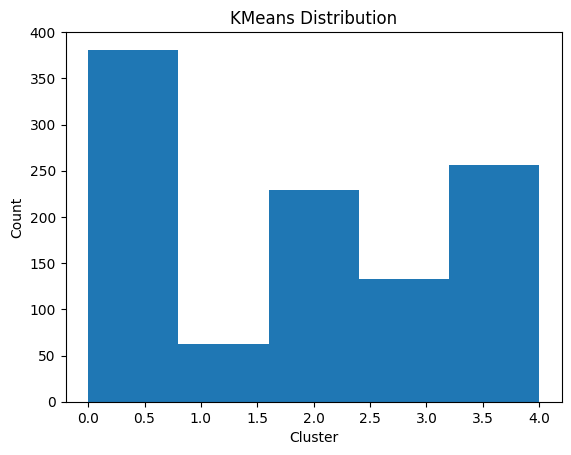

In [ ]:
import matplotlib.pyplot as plt
imputer = SimpleImputer(strategy='mean')

# Fit the imputer transformer on the data and transform the data to fill in the missing values
imputed_data = imputer.fit_transform(train_data)

# Initialize the KMeans model with the chosen number of clusters
model = KMeans(n_clusters=k)

# Fit the KMeans model to the data
model.fit(imputed_data)

# Get the cluster labels for each data point
labels = model.labels_

# Plot the distribution of the labels
plt.hist(labels, bins=k)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('KMeans Distribution')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Perform PCA on the data to reduce the dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(imputed_train_data)

# Assuming your data is stored in the variable 'data'
pca = PCA(n_components=2)  # Specify the number of components you want to retain (2 in this case)
pca.fit(data)

# Get the explained variance ratio
# The 'explained_variance_ratio_' attribute of the PCA object contains the explained variance ratio for each principal component,
explained_var_ratio = pca.explained_variance_ratio_

# Calculate the percentage of the first two PCs
percentage_first_two_pcs = sum(explained_var_ratio) * 100

print(percentage_first_two_pcs)

12.978142762683959


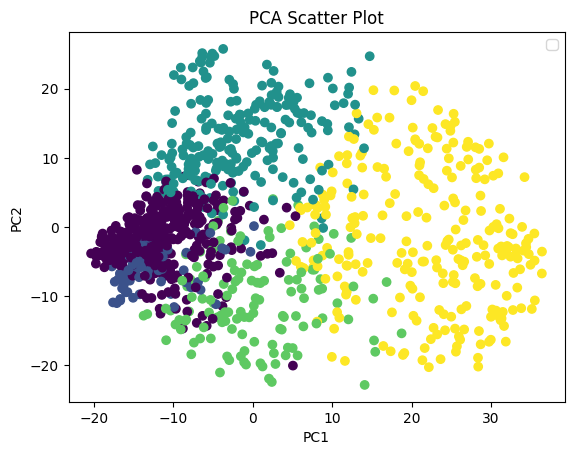

'for label in np.unique(labels):\n    mask = (labels == label)\n    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], label=f"Cluster {label}")'

In [ ]:
# Create a scatter plot of the first two principal components colored by their cluster label
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


# Iterate over the unique labels and plot the data points with that label
'''for label in np.unique(labels):
    mask = (labels == label)
    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], label=f"Cluster {label}")'''
    

In [ ]:
# Novelty metrics calculation:
# calculate the average distance of samples to their own cluster centroid
import math as math
centroids = model.cluster_centers_
cluster_points = []
distance_lst = []
average_distance_per_cluster = []
for i in range(k):
    cluster_points.append([])
    distance_lst.append([])

    # get the coordinates of the current cluster centroid 
    centroid = centroids[i]

    # Select the data points that belong to the desired cluster centroid
    for j in test_labels:
        if test_labels[j] == i:
            cluster_points[i].append(imputed_test_data[j])
            # Calculate the Euclidean distance between the data point and the centroid
            distance_lst[i].append(math. dist(imputed_test_data[j], centroid))
    # Compute the average distance per cluster
    if len(distance_lst[i]) != 0:
        average_distance_per_cluster.append(sum(distance_lst[i])/len(distance_lst[i]))
    else:
        average_distance_per_cluster.append("N/A")

print((average_distance_per_cluster))

['N/A', 58.05271071919603, 'N/A', 56.48762199433705, 43.65905505250749]


In [ ]:
# Two class labels are missing form the test dataset. Might need reshuffling the data.
#
novel_samples = []
for i in range(k):
  centroid = centroids[i]
  if average_distance_per_cluster == "N/A":
      novel_samples.append([])
  else:
      novel_samples.append([])
      for j in test_labels:
            if test_labels[j] == i:
                cluster_points[i].append(imputed_test_data[j])
                # Calculate the Euclidean distance between the data point and the centroid
                if math. dist(imputed_test_data[j], centroid) >= average_distance_per_cluster[i]:
                    novel_samples[i].append(imputed_test_data[j])
print(novel_samples)

[[], [], [], [array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.44890568,  1.42885184,  0.38147905, ..., -1.22265136,
       -1.21646023, -0.8297559 ]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355]), array([-0.19285443, -1.17554247,  4.10390139, ..., -0.48835459,
       -0.2424455 ,  1.44354355

In [ ]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [ ]:
# Surprise metric calculation:
# Calculate the distances between each cluster centroid
centroid_values = []
for i in centroids: 
    centroid_values.append(i)

from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances
distances = pdist(centroid_values)

# calculate the average of the pairwise distances
distances_sum = 0
for i in distances:
    distances_sum += i

numOfPairs=ncr(5,2)

avg_dis_centroid = distances_sum/numOfPairs 



In [ ]:
centroid_values

[array([-0.22186216,  0.06822945,  0.66431125, ...,  0.37413314,
         0.16872525, -0.58850439]),
 array([-0.05418504, -0.4903189 ,  1.29893185, ..., -0.19379214,
         0.37231122, -0.05983274]),
 array([ 0.06235258,  0.17353796,  0.58793943, ...,  1.14473311,
         0.02960549, -0.13085185]),
 array([-0.70450781, -0.38951868,  1.39856572, ...,  0.19173001,
         0.42046027,  0.19923308]),
 array([-0.26778131, -1.03556713,  0.76724058, ...,  1.38989038,
        -0.07597817,  1.24472838])]

In [ ]:
avg_dis_centroid

32.723803124981615

In [ ]:
surprising_samples = []

for  i in imputed_test_data:
    # Calculate the Euclidean distance between the new sample and each centroid
    difference1 = np.linalg.norm(centroids - i, axis=1)
    # Assign the new sample to the cluster with the closest centroid
    cluster_index = np.argmin(difference1)
    # Calculate the Euclidean distance between the new sample and its cluster centroid
    difference2 = np.linalg.norm(centroids[cluster_index] - i)
    if difference2 >= avg_dis_centroid:
        surprising_samples.append(i)

In [ ]:
surprising_samples

[array([230., 228., 229., ...,  41.,  43.,  46.]),
 array([231., 231., 230., ..., 159., 135., 173.]),
 array([99., 70., 21., ..., 15., 11.,  8.]),
 array([143., 142., 141., ...,  98.,  85.,  59.]),
 array([243., 243., 243., ...,  24.,  24.,  27.]),
 array([221., 235., 233., ...,  28.,  27.,  45.]),
 array([51., 54., 58., ..., 39., 35., 31.]),
 array([255., 255., 255., ..., 255., 255., 255.]),
 array([255., 255., 255., ..., 251., 251., 255.]),
 array([12., 12., 14., ...,  6.,  6.,  6.]),
 array([27., 29., 29., ...,  9., 12., 11.]),
 array([41., 21.,  0., ...,  0., 44., 66.]),
 array([221., 221., 221., ...,  94., 104., 112.]),
 array([249., 249., 249., ..., 208., 207., 207.]),
 array([120., 118., 118., ..., 245., 246., 245.]),
 array([207., 207., 207., ...,  42.,  40.,  43.]),
 array([229., 223., 234., ..., 185., 178., 185.]),
 array([67., 69., 71., ..., 26., 25., 24.]),
 array([20., 27., 44., ..., 13., 13., 12.]),
 array([252., 252., 252., ..., 252., 252., 252.]),
 array([  3.,   7.,   

In [ ]:
print(ncr(5,2))

10
